In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # 高清显示

import sys
import os

# 添加项目根目录到 Python 路径
sys.path.append(os.path.abspath('../'))

# 检查当前工作目录
print("📍 当前工作目录:", os.getcwd())
print("🔍 Python 路径已添加: ../ (项目根)")


📍 当前工作目录: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\notebooks
🔍 Python 路径已添加: ../ (项目根)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.novelty_analyzer import run_novelty_analysis, NoveltyAnalyzer

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("模块导入成功")


✅ 模块导入成功


In [ ]:
def check_file(path):
    full_path = os.path.join('..', path)
    if os.path.exists(full_path):
        df = pd.read_csv(full_path)
        print(f" {path} 存在 | 形状: {df.shape} | 论文数: {len(df)}")
        return df
    else:
        print(f"❌ 找不到文件: {full_path}")
        return None

# 检查两个数据集
df_all = check_file('data/raw/data_with_citing.csv')
df_top10 = check_file('data/raw/top10_journals_data.csv')

if df_all is not None and df_top10 is not None:
    print("\n数据字段预览:")
    print("-" * 40)
    print("Top10 数据关键字段:")
    print(df_top10[['DOI', 'Source Title', 'Keywords', 'Publication Year']].head(2))


✅ data/raw/data_with_citing.csv 存在 | 形状: (13709, 10) | 论文数: 13709
✅ data/raw/top10_journals_data.csv 存在 | 形状: (9747, 10) | 论文数: 9747

📌 数据字段预览:
----------------------------------------
Top10 数据关键字段:
                         DOI                   Source Title  \
0  10.1186/s12938-018-0485-5  BIOMEDICAL ENGINEERING ONLINE   
1  10.1109/MPUL.2018.2814238                     IEEE PULSE   

                                            Keywords  Publication Year  
0  WALL SHEAR-STRESS; FLOW; COARCTATION; DIAGNOSI...              2018  
1                                                NaN              2018  


🚀 开始执行组合新颖性分析...
💡 使用全量数据构建背景知识库，评估 Top10 期刊的新颖性
📁 加载背景数据（全量）: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\data/raw/data_with_citing.csv
📁 加载目标数据（Top10）: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\data/raw/top10_journals_data.csv

🔄 正在使用全量数据构建关键词组合时间线...
📝 提取论文关键词...
✅ 关键词提取完成: 9637/13706 篇有关键词
   共 16950 个独特关键词, 总共出现 54374 次
📅 构建关键词组合时间线...
✅ 构建完成: 共 155107 个关键词对组合
⚠️  186 篇论文缺少年份信息被跳过
✅ 全局时间线构建完成 | 共 155107 个关键词对

📊 开始计算 Top10 期刊的组合新颖性...
📝 提取论文关键词...
✅ 关键词提取完成: 7256/9744 篇有关键词
   共 13576 个独特关键词, 总共出现 41572 次
🎯 计算论文组合新颖性得分...
✅ 完成: 6489/9744 篇论文获得有效得分
📚 按期刊聚合结果...
✅ 聚合完成: 共 10 种期刊
✅ 已保存 JSON: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\outputs/novelty\journal_novelty_scores.json
✅ 已保存 CSV: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\outputs/novelty\journal_novelty_ranking.csv
✅ 已保存 TXT: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\outputs/novelty\top_journals_by_novelty.txt


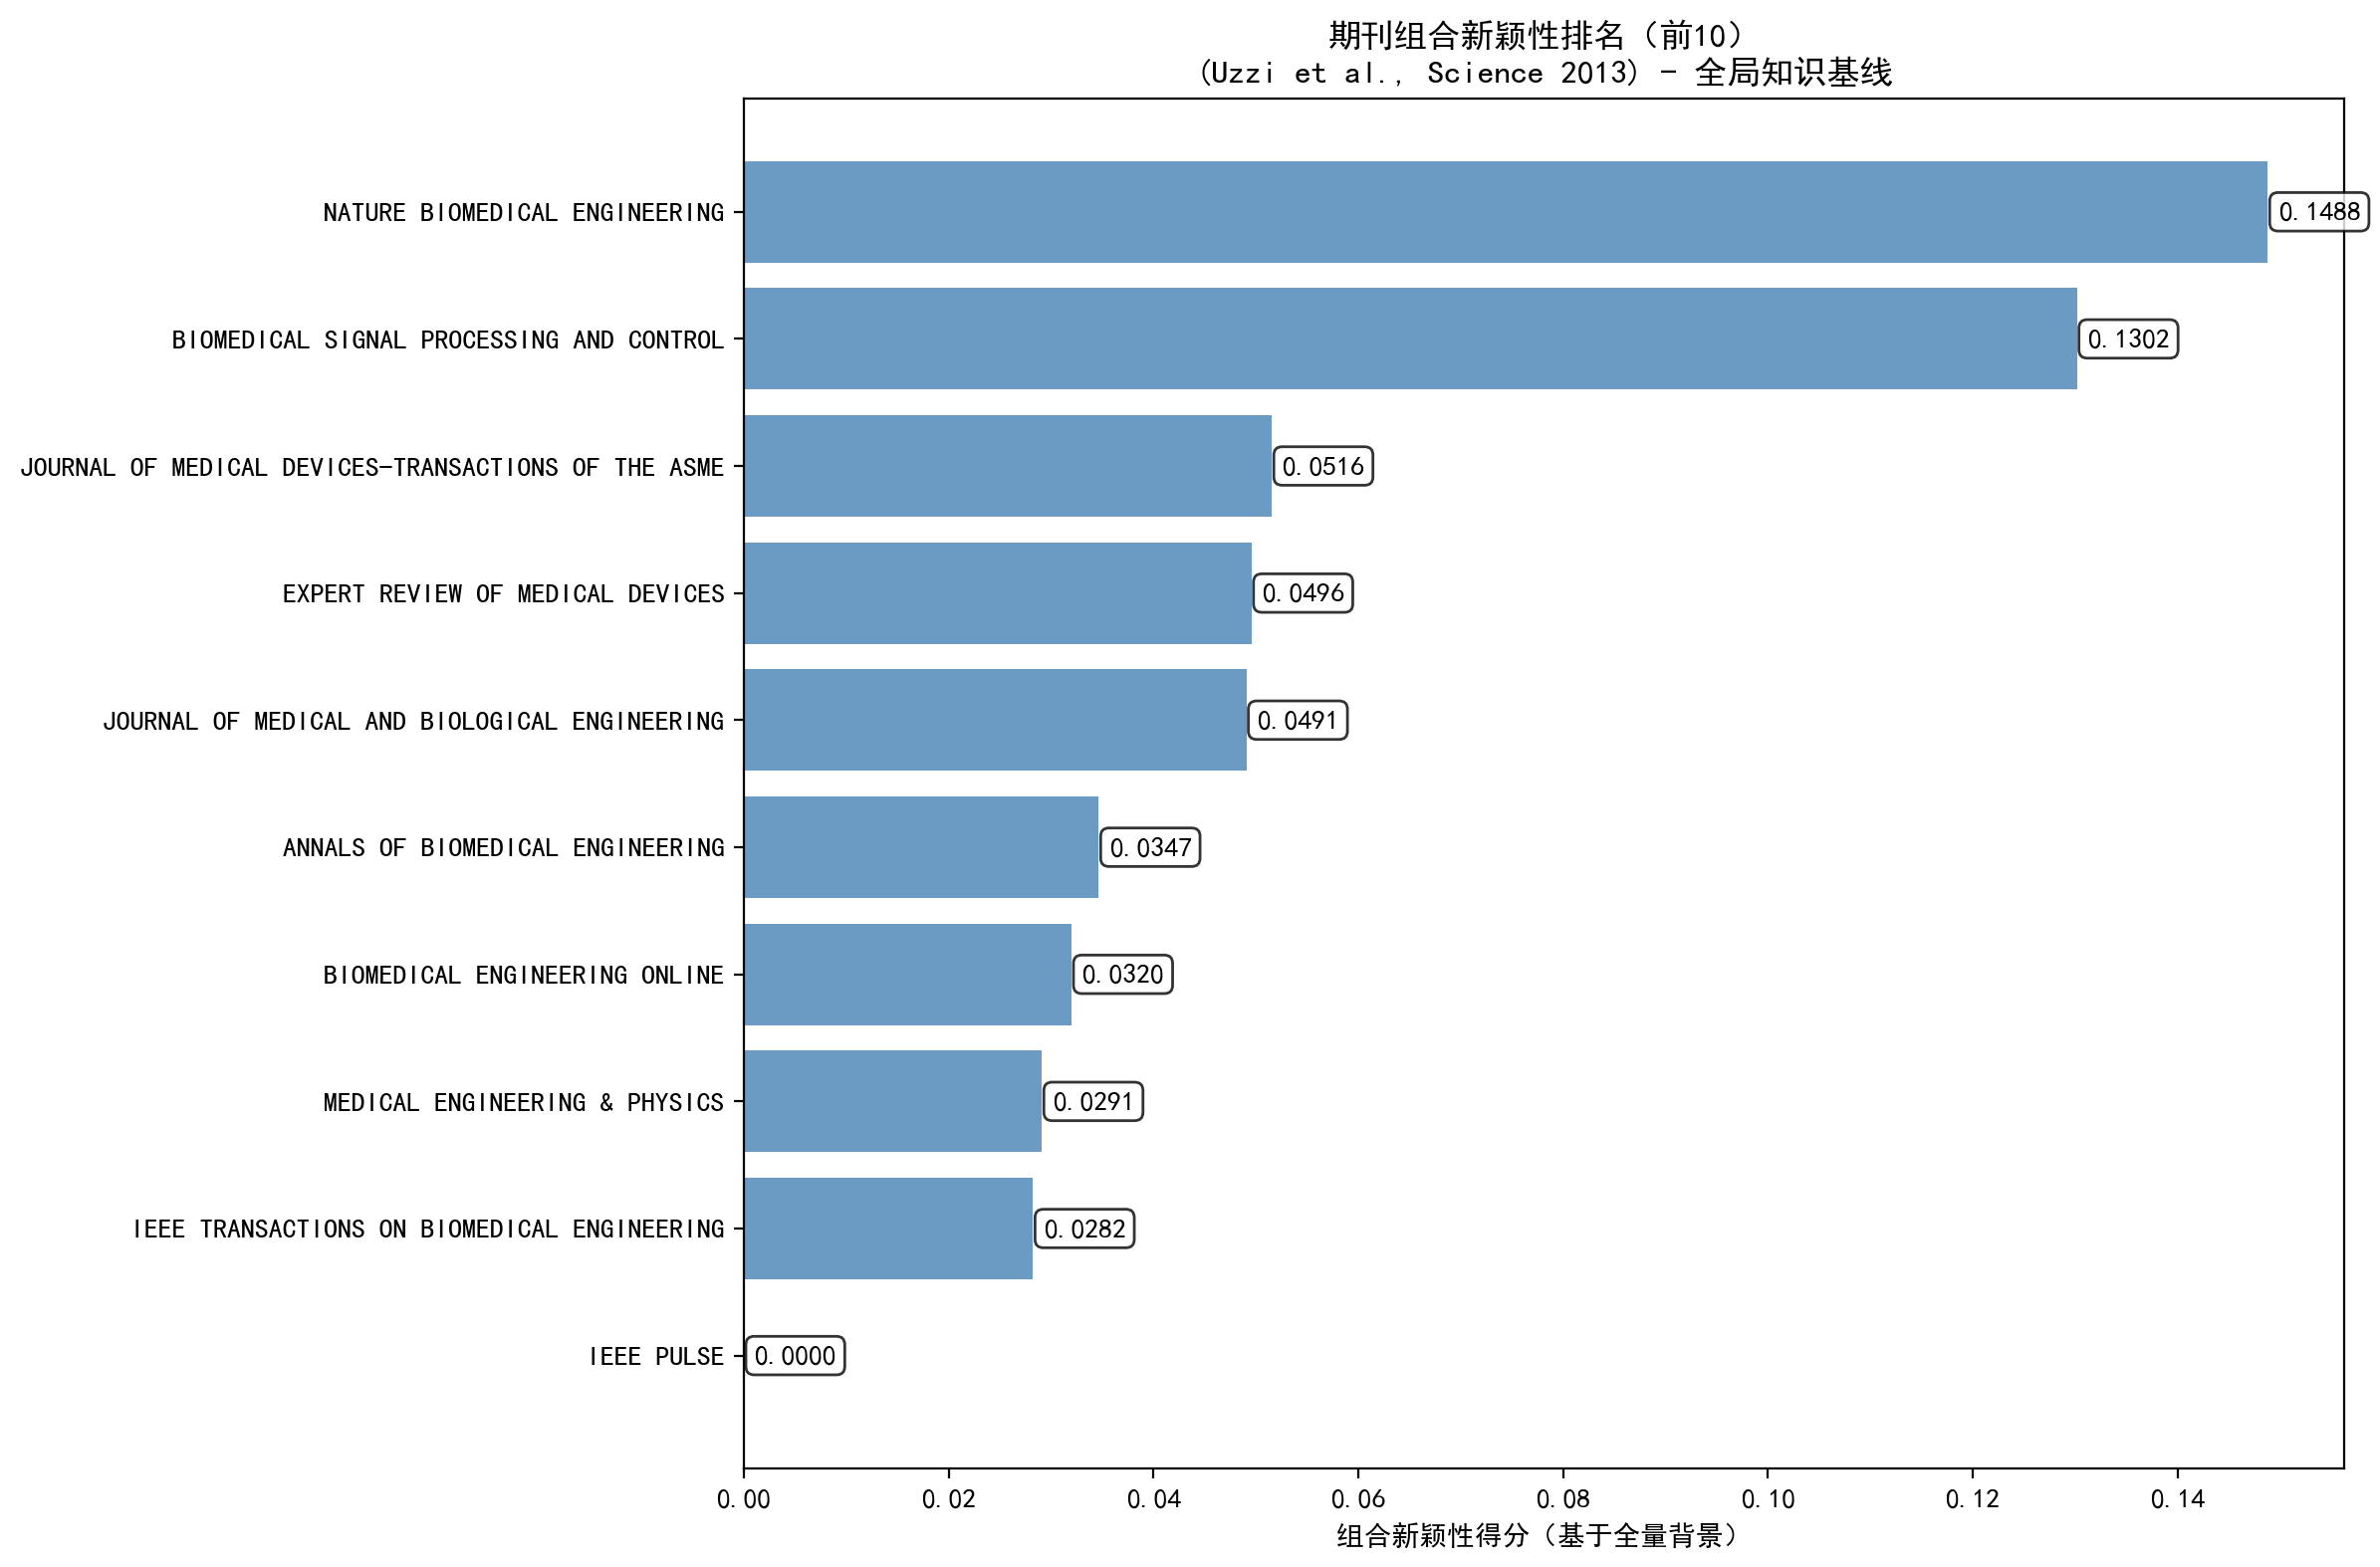

✅ 已保存图表: c:\Users\28623\OneDrive\Desktop\BankJournalAnalysis\outputs/novelty\novelty_ranking.png
🎉 分析完成！


In [ ]:
print("开始执行组合新颖性分析...")
print("使用全量数据构建背景知识库，评估 Top10 期刊的新颖性")

results = run_novelty_analysis(
    background_data_path='data/raw/data_with_citing.csv',
    target_data_path='data/raw/top10_journals_data.csv',
    output_dir='outputs/novelty'
)

print("分析完成！")


In [ ]:
ranking = results['ranking']

print("期刊组合新颖性得分排名（前10）")
print("="*60)
for i, row in ranking.head(10).iterrows():
    journal = row['Source Title']
    score = row['novelty_score']
    print(f"{i+1:2d}. {journal}")
    print(f"     💡 得分: {score:.6f}")

# 统计信息
print(f"\n全体期刊统计:")
print(f"   平均得分: {ranking['novelty_score'].mean():.4f}")
print(f"   标准差:   {ranking['novelty_score'].std():.4f}")
print(f"   最高分:   {ranking['novelty_score'].max():.4f}")
print(f"   最低分:   {ranking['novelty_score'].min():.4f}")


📊 期刊组合新颖性得分排名（前10）
 1. NATURE BIOMEDICAL ENGINEERING
     💡 得分: 0.148828
 2. BIOMEDICAL SIGNAL PROCESSING AND CONTROL
     💡 得分: 0.130197
 3. JOURNAL OF MEDICAL DEVICES-TRANSACTIONS OF THE ASME
     💡 得分: 0.051562
 4. EXPERT REVIEW OF MEDICAL DEVICES
     💡 得分: 0.049580
 5. JOURNAL OF MEDICAL AND BIOLOGICAL ENGINEERING
     💡 得分: 0.049073
 6. ANNALS OF BIOMEDICAL ENGINEERING
     💡 得分: 0.034651
 7. BIOMEDICAL ENGINEERING ONLINE
     💡 得分: 0.031996
 8. MEDICAL ENGINEERING & PHYSICS
     💡 得分: 0.029102
 9. IEEE TRANSACTIONS ON BIOMEDICAL ENGINEERING
     💡 得分: 0.028241
10. IEEE PULSE
     💡 得分: 0.000000

📈 全体期刊统计:
   平均得分: 0.0553
   标准差:   0.0470
   最高分:   0.1488
   最低分:   0.0000


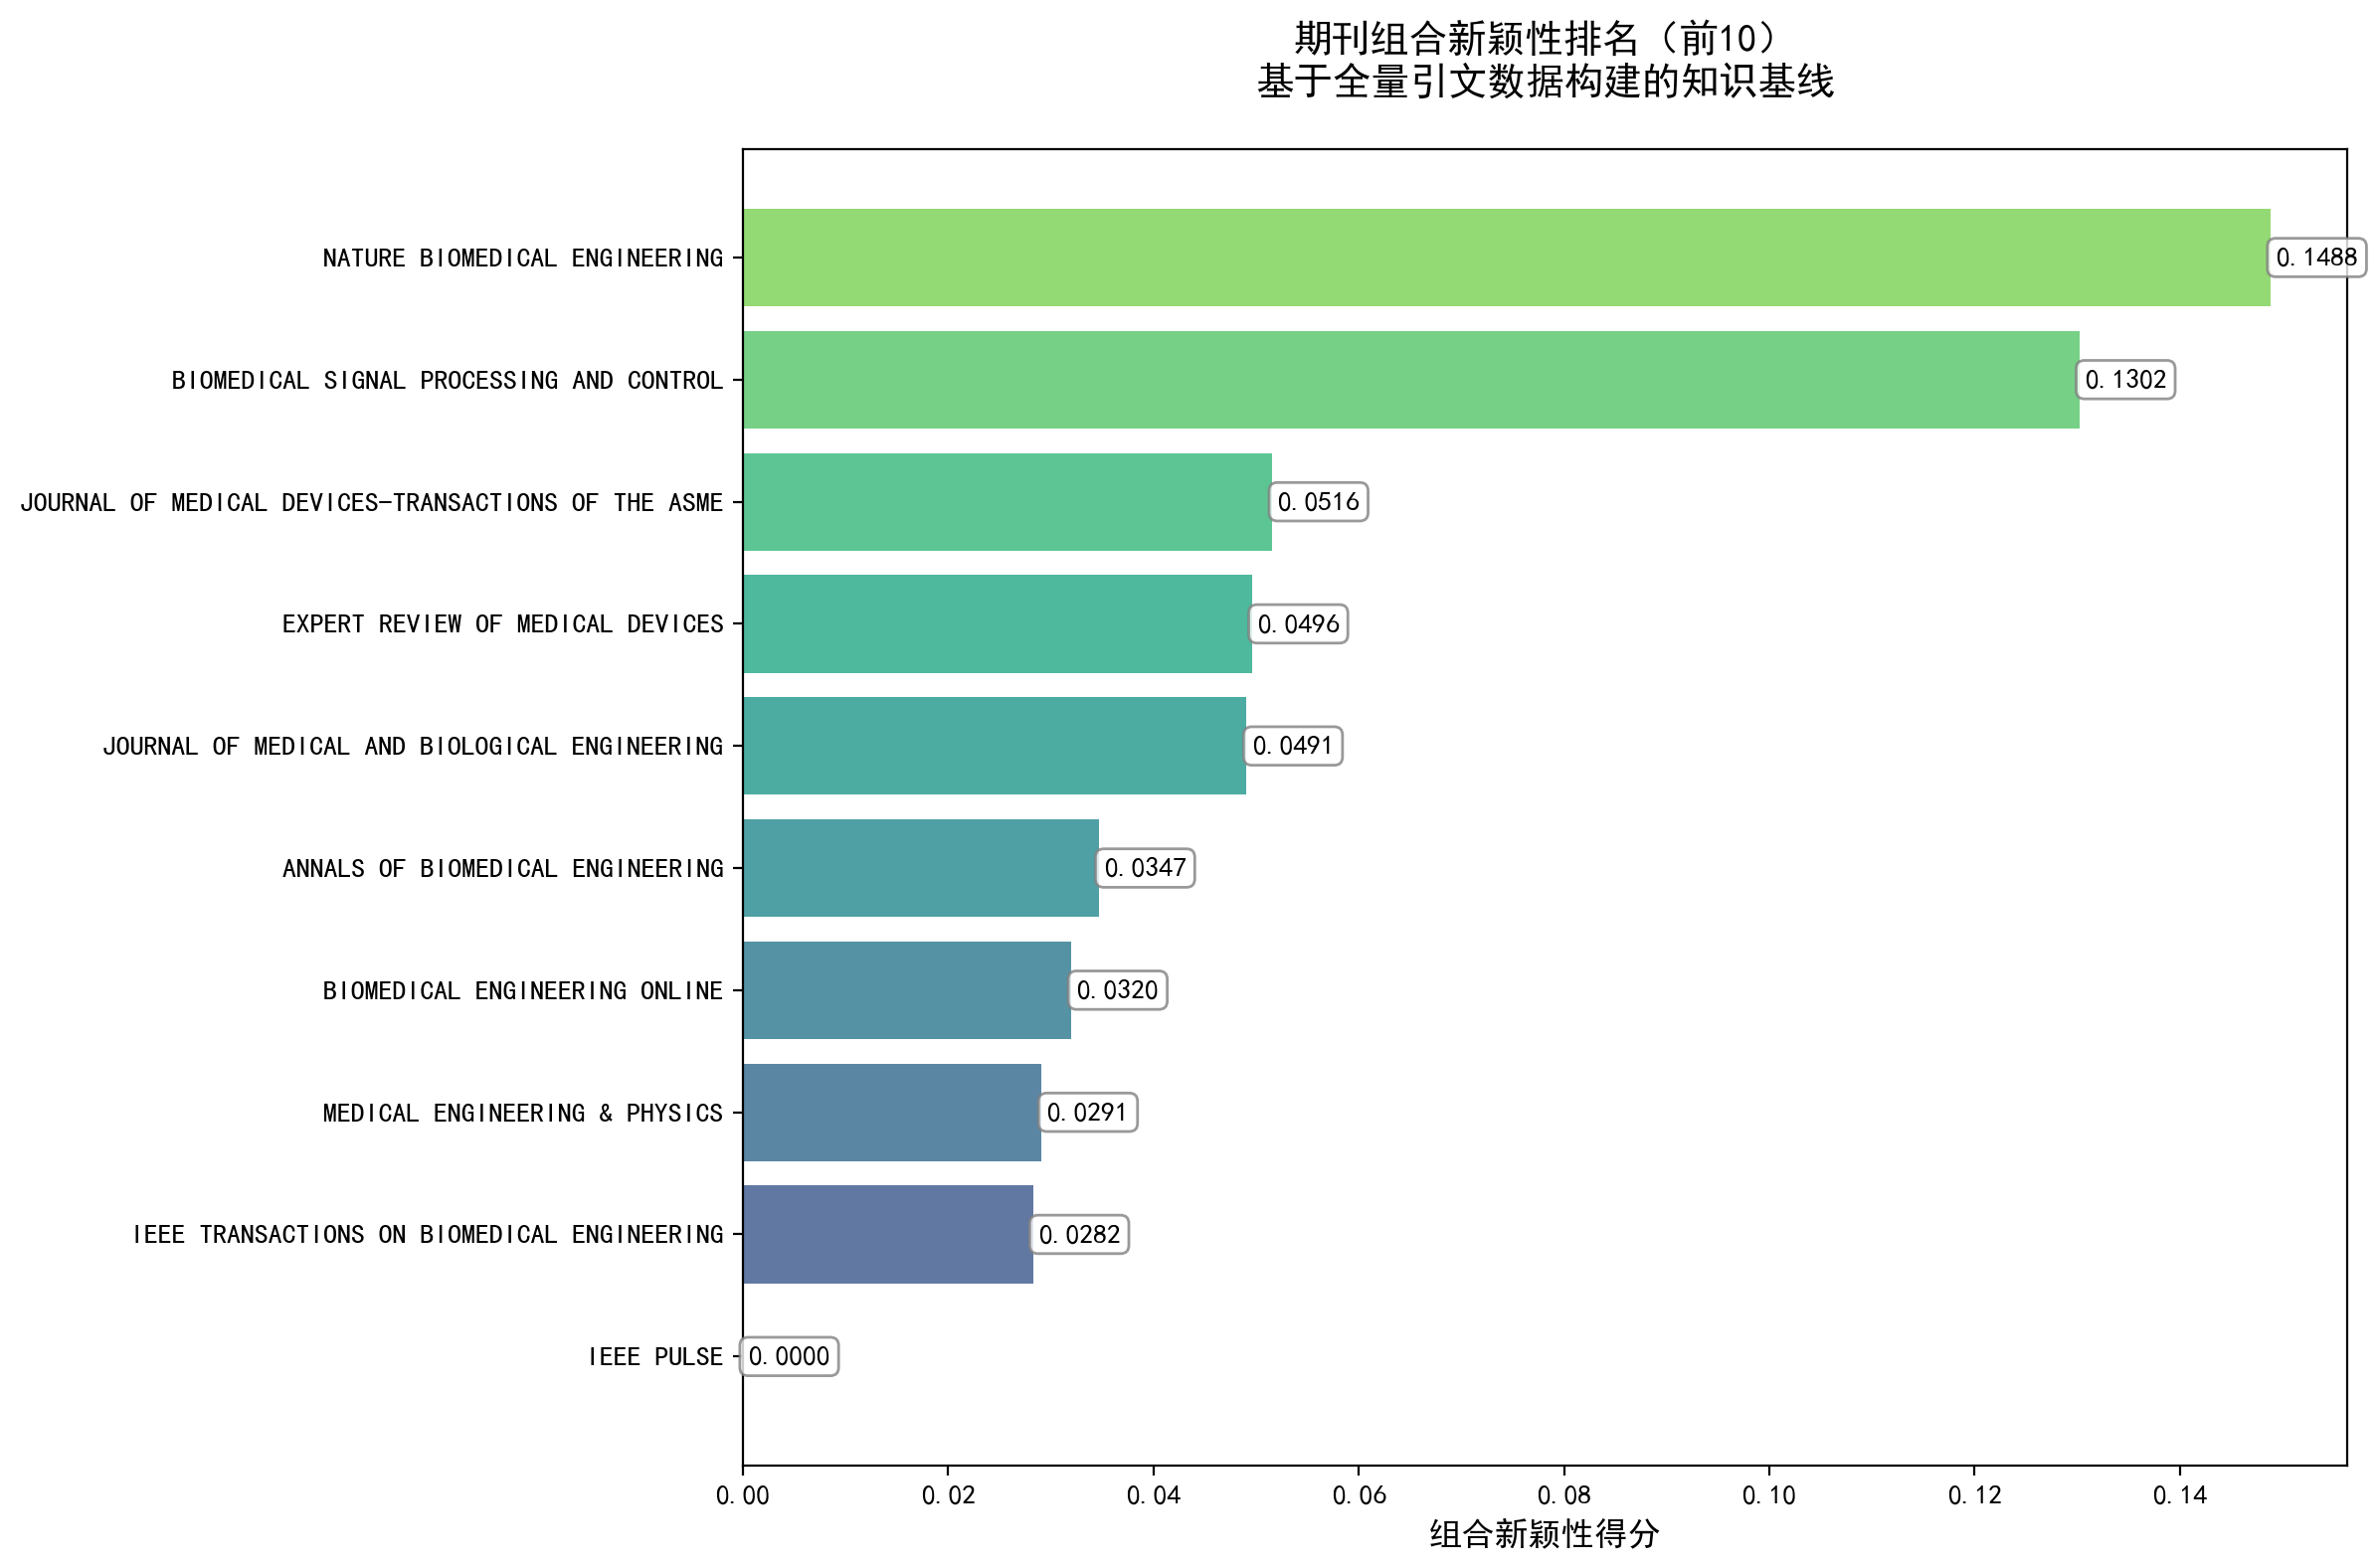

In [ ]:
top10 = ranking.head(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(top10)))
bars = plt.barh(top10['Source Title'], top10['novelty_score'], color=colors, alpha=0.8)

# 添加数值标签
for bar, val in zip(bars, top10['novelty_score']):
    plt.text(bar.get_width() + 0.0005, bar.get_y() + bar.get_height()/2,
             f'{val:.4f}', ha='left', va='center', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.xlabel('组合新颖性得分', fontsize=12)
plt.title('期刊组合新颖性排名（前10）\n基于全量引文数据构建的知识基线', fontsize=14, pad=20)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# 选第一个期刊
target_journal = ranking.iloc[0]['Source Title']
print(f"深入分析期刊: {target_journal}")

# 获取该期刊的所有论文
analyzer = results['analyzer']
target_papers = df_top10[df_top10['Source Title'] == target_journal]

print(f"属于该期刊的论文数: {len(target_papers)}")

# 显示其中一篇有关键词的论文
sample_paper = target_papers.dropna(subset=['Keywords']).iloc[0]
doi = sample_paper['DOI']
year = int(sample_paper['Publication Year']) if pd.notna(sample_paper['Publication Year']) else '未知'

print(f"\n示例论文 (DOI): {doi}")
print(f"出版年份: {year}")
print(f"关键词: {sample_paper['Keywords']}")

# 查看它的关键词组合是否新颖
keywords = analyzer.paper_keywords.get(doi, [])
if len(keywords) >= 2:
    from itertools import combinations
    pairs = list(combinations(keywords, 2))
    current_year = df_top10['Publication Year'].max()

    novel_pairs = []
    for p in pairs:
        norm_p = tuple(sorted(p))
        first_year = analyzer.keyword_pairs_first_seen.get(norm_p, float('inf'))
        if abs(first_year - current_year) <= 1:
            novel_pairs.append((p, first_year))

    print(f"\n🆕 新组合 ({len(novel_pairs)}/{len(pairs)}):")
    for pair, fy in novel_pairs:
        print(f"   • {pair[0]} + {pair[1]} (首次出现在 {fy})")
else:
    print("⚠️ 该论文关键词不足两个，无法形成组合")


🔍 深入分析期刊: NATURE BIOMEDICAL ENGINEERING
📄 属于该期刊的论文数: 352

📝 示例论文 (DOI): 10.1038/s41551-018-0217-y
📅 出版年份: 2018
🔖 关键词: MYOCARDIAL-PERFUSION MRI; LOW-RANK; INVERSION-RECOVERY; SPARSITY CONSTRAINTS; T-2; BLOOD; T1; QUANTIFICATION; RECONSTRUCTION; MULTICONTRAST

🆕 新组合 (0/45):


In [ ]:
bg_analyzer = results['global_analyzer']

print("全局关键词组合时间线统计")
print("-" * 40)
print(f"总独特关键词数: {len(set(kw for kws in bg_analyzer.paper_keywords.values() for kw in kws))}")
print(f"总关键词对数量: {len(bg_analyzer.keyword_pairs_first_seen)}")

# 显示最早和最晚出现的组合示例
sorted_pairs = sorted(bg_analyzer.keyword_pairs_first_seen.items(), key=lambda x: x[1])

print(f"\n最早出现的组合（示例前5）:")
for (k1, k2), year in sorted_pairs[:5]:
    print(f"  {k1} + {k2} → {year}")

print(f"\n🆕 最近出现的组合（过去两年内，示例前5）:")
recent = [(p, y) for p, y in sorted_pairs if y >= (2024 - 2)]
for (k1, k2), year in recent[:5]:
    print(f"  {k1} + {k2} → {year}")


🌐 全局关键词组合时间线统计
----------------------------------------
总独特关键词数: 16950
总关键词对数量: 155107

📅 最早出现的组合（示例前5）:
  cortex + tissue → 1990
  thermal-conductivity + tissue → 1990
  cortex + oscillations → 1990
  cortex + perfusion → 1990
  cortex + pulse-decay method → 1990

🆕 最近出现的组合（过去两年内，示例前5）:
  blind source separation + removal → 2022
  neural-network + resource → 2022
  net + network → 2022
  biomaterials + coatings → 2022
  approximate entropy + rate-variability → 2022
